# 2016017032 물리학과 이호열
# hw10

## IMDB Datasets

In [2]:
import numpy as np
from tensorflow import keras
from keras import models 
from keras import layers
import matplotlib.pyplot as plt

from keras.datasets import imdb
# https://www.imdb.com/
(X, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

In [3]:
# text to vector
def vect(seq, dim=10000):
    x=np.zeros((len(seq),dim))
    for n, i in enumerate(seq):
        x[n, i] = 1
    return x

X_train=vect(X)
X_test=vect(X_test)

In [4]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [5]:
net = models.Sequential()
net.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(16, activation='relu'))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(1, activation='sigmoid'))
net.compile(optimizer='nadam', loss='binary_crossentropy', metrics = ['acc'])

X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

val = net.fit(partial_X_train, partial_y_train, epochs=5, batch_size=128, validation_data=(X_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 3s 207us/step - loss: 0.5402 - acc: 0.7197 - val_loss: 0.3130 - val_acc: 0.8805
Epoch 2/5
15000/15000 [==============================] - 2s 163us/step - loss: 0.3339 - acc: 0.8700 - val_loss: 0.2829 - val_acc: 0.8814
Epoch 3/5
15000/15000 [==============================] - 2s 165us/step - loss: 0.2670 - acc: 0.9021 - val_loss: 0.2869 - val_acc: 0.8852
Epoch 4/5
15000/15000 [==============================] - 2s 157us/step - loss: 0.2243 - acc: 0.9174 - val_loss: 0.3223 - val_acc: 0.8821
Epoch 5/5
15000/15000 [==============================] - 2s 157us/step - loss: 0.1902 - acc: 0.9309 - val_loss: 0.3518 - val_acc: 0.8822


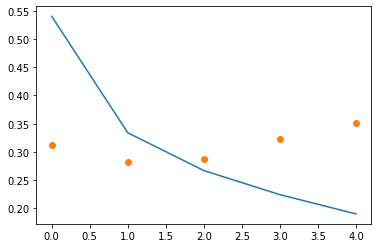

In [6]:
val_dict = val.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']
x = np.arange(0,len(loss))

plt.plot(x,loss,'-')
plt.plot(x,val_loss,'o')

In [7]:
test_loss, test_acc = net.evaluate(X_test,y_test)

25000/25000 [==============================] - 3s 119us/step


## IMDB Classification using simple RNN

In [9]:
from keras.preprocessing import sequence

max_words=10000 
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

maxlen = 100 # sequence length
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [10]:
X_train[0]

array([1415,   33,    6,   22,   12,  215,   28,   77,   52,    5,   14,
        407,   16,   82,    2,    8,    4,  107,  117, 5952,   15,  256,
          4,    2,    7, 3766,    5,  723,   36,   71,   43,  530,  476,
         26,  400,  317,   46,    7,    4,    2, 1029,   13,  104,   88,
          4,  381,   15,  297,   98,   32, 2071,   56,   26,  141,    6,
        194, 7486,   18,    4,  226,   22,   21,  134,  476,   26,  480,
          5,  144,   30, 5535,   18,   51,   36,   28,  224,   92,   25,
        104,    4,  226,   65,   16,   38, 1334,   88,   12,   16,  283,
          5,   16, 4472,  113,  103,   32,   15,   16, 5345,   19,  178,
         32])

In [22]:
rnn = models.Sequential()
rnn.add(layers.Embedding(max_words, 16)) # 각각의 단어를 n=16 차원 공간에 올리기
rnn.add(layers.SimpleRNN(32,return_sequences='True')) 
# 다층 RNN를 하기 위해 return_sequences = True로 설정
rnn.add(layers.Dropout(0.2))
rnn.add(layers.SimpleRNN(16,return_sequences='False'))
rnn.add(layers.SimpleRNN(16))
rnn.add(layers.Dropout(0.2))
rnn.add(layers.Dense(1, activation='sigmoid'))
rnn.compile(optimizer='nadam',loss='binary_crossentropy',metrics=['acc'])

In [23]:
rnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          1568      
_________________________________________________________________
dropout_6 (Dropout)          (None, None, 32)          0         
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, None, 16)          784       
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 16)                528       
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [40]:
history = rnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 15s 775us/step - loss: 0.0603 - acc: 0.9832 - val_loss: 0.9439 - val_acc: 0.7540
Epoch 2/5
20000/20000 [==============================] - 16s 793us/step - loss: 0.0443 - acc: 0.9880 - val_loss: 1.0004 - val_acc: 0.7746
Epoch 3/5
20000/20000 [==============================] - 16s 777us/step - loss: 0.0644 - acc: 0.9796 - val_loss: 0.7011 - val_acc: 0.7840
Epoch 4/5
20000/20000 [==============================] - 16s 795us/step - loss: 0.0497 - acc: 0.9860 - val_loss: 0.9064 - val_acc: 0.7742
Epoch 5/5
20000/20000 [==============================] - 16s 779us/step - loss: 0.0465 - acc: 0.9867 - val_loss: 0.9585 - val_acc: 0.7750


In [43]:
print("\n 테스트 정확도: %.4f" % (rnn.evaluate(X_test, y_test)[0]))

25000/25000 [==============================] - 8s 321us/step

 테스트 정확도: 0.9725


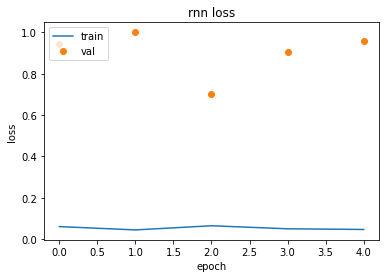

In [44]:
loss=history.history['loss']
val=history.history['val_loss']
plt.plot(loss)
plt.plot(val,'o')
plt.title('rnn loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
(rnn.evaluate(X_test, y_test)[0]))
정확도가 아니라 손실 값일걸요?